# Derivación numérica: diferencias finitas

En este notebook, implementarán funciones que calculan la derivada numéricamente, de una función $f(x)$ en un punto $x_0$ dado.

## Derivada *derecha*

Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la definición de la derivada:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

que requiere la especificación de `h`. (Este método se conoce por el nombre de *diferencias finitas*.)

A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). (Para ser concretos, obtengan la derivada de la función de prueba $f(x) = 3x^3-2$, en $x_0=1$.) Dibujen, como función de $h$, el error de su cálculo (usar escala logarítmica en ambos ejes puede ser una buena idea). A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada? 


In [2]:
"""
`derivada_derecha(f, h, x_0)` devuelve el valor aproximado de `f'(x_0)` empleando el 
método de aproximación lateral (aproximando el límite).

f debe ser una función, h y x_0 números reales. El valor por defecto para x_0 es 0.
"""
function derivada_derecha(f::Function, h::Real, x_0 = 0.0)
    (f(x_0 + h) - f(x_0)) / h
end

derivada_derecha (generic function with 2 methods)

In [3]:
f(x) = 3x^3 - 2

f (generic function with 1 method)

In [26]:
derivada_derecha(f,1e-6,1)

9.000008999393572

In [27]:
#Con este arreglo se trabajará para graficar los errores de las derivadas.
intervalo_h = logspace(-15,-1, 100); 

In [6]:
using PyPlot

In [28]:
#Calculo del error de la derivada lateral
err_deriv = Float64[abs(derivada_derecha(f,x,1)-9) for x in intervalo_h];

In [29]:
#Arreglo para realizar regresiones lineales
intervalo_h2 = logspace(-8,-1,100);

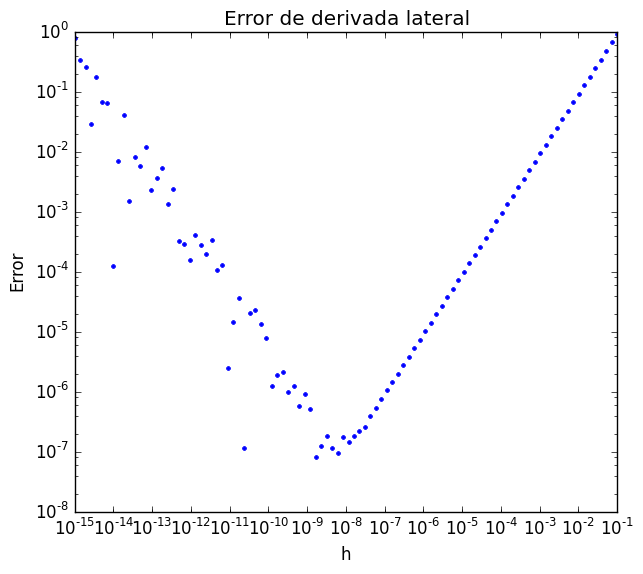

PyObject <matplotlib.text.Text object at 0x7fe68c101908>

In [30]:
#Graficación del error absoluto usando derivadas laterales, se hace uso de escala loglog
figure(figsize = (7,6))
loglog(intervalo_h, err_deriv, marker = ".", linestyle = "" )
xlabel("h")
ylabel("Error")
title("Error de derivada lateral")

**Respuesta:** El error decrece de manera "lineal" (recordando que la gráfica está en escala logarítmica*) hasta llegar a valores cercanos a $h\approx 10^{-8}$, para valores menores a éste el error crece de manaera "lineal". caótica.

*Éste comportamiento puede ser modelado notando que la recta puede ser vista como:

\begin{align}
    \log(y) &= m\log(x) + b \\
    \rightarrow y &= Cx^m \ \ \ C = 10^b
\end{align}

Los parámetros $m$ y $b$ pueden ser calculados con la función `linreg` (claro, en la región donde el error tiene comportamiento lineal), es necesario usar $\log(h)$ y $\log(error)$

In [11]:
?linreg

search: 

```
linreg(x, y, w)
```

Weighted least-squares linear regression.

```
linreg(x, y) -> a, b
```

Perform linear regression. Returns `a` and `b` such that `a + b*x` is the closest straight line to the given points `(x, y)`, i.e., such that the squared error between `y` and `a + b*x` is minimized.

**Example**:

```
using PyPlot
x = [1.0:12.0;]
y = [5.5, 6.3, 7.6, 8.8, 10.9, 11.79, 13.48, 15.02, 17.77, 20.81, 22.0, 22.99]
a, b = linreg(x, y)          # Linear regression
plot(x, y, "o")              # Plot (x, y) points
plot(x, [a+b*i for i in x])  # Plot line determined by linear regression
```


In [12]:
#Calculando parámetros para la derivada lateral
y = log(err_deriv)
x = log(intervalo_h2)
linreg(x, y)

linreg linrange LineNumberNode



2-element Array{Float64,1}:
 -7.75458  
  0.0820939

## Derivada simétrica

Repitan el ejercicio anterior usando cómo definición de la derivada la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}



In [13]:
"""
`derivada_central(f, h, x_0)` devuelve el valor aproximado de `f'(x_0)` empleando el 
método de aproximación central (aproximando el límite con un pequeño cambio de variable).

f debe ser una función, h y x_0 números reales. El valor por defecto para x_0 es 0.
"""
function derivada_central(f::Function, h::Real, x_0 = 0.0)
    (f(x_0 + h) - f(x_0 - h)) / (2h)
end

derivada_central (generic function with 2 methods)

In [31]:
derivada_central(f,1e-6,1)

8.999999999925734

In [33]:
err_deriv2 = Float64[abs(derivada_central(f,x,1)-9) for x in intervalo_h];

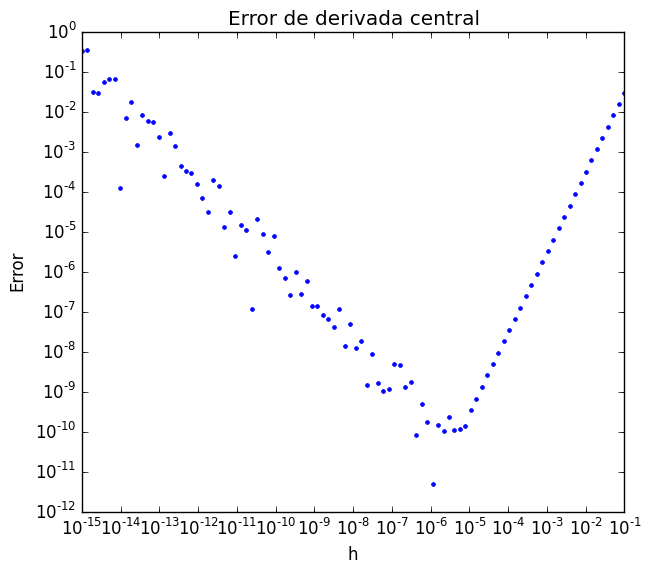

PyObject <matplotlib.text.Text object at 0x7fe68c070cf8>

In [34]:
#Graficación del error absoluto usando derivadas centrales, se hace uso de escala loglog
figure(figsize = (7,6))
loglog(intervalo_h, err_deriv2, marker = ".", linestyle ="")
xlabel("h")
ylabel("Error")
title("Error de derivada central")

*** Observaciones *** Es raro, porque el crecimiento lineal del error comienza en $h\approx 10^{-5}$, antes de lo observado en el uso de derivadas laterales.

In [35]:
#Calculando parámetros para la derivada lateral
intervalo_h3 = logspace(-5,-1,1000)
y_3 = Float64[abs(derivada_central(f,x,1)-9) for x in intervalo_h3]
y = log(y_3)
x = log(intervalo_h3)
linreg(x, y)

2-element Array{Float64,1}:
 1.10107
 2.00046

## Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Así, tenemos la definición:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


In [18]:
"""
`derivada_compleja(f, h, x_0)` devuelve el valor aproximado de `f'(x_0)` empleando el 
método de aproximación por variación de parámetro infinitesimal e imaginario.

f debe ser una función, h y x_0 números reales. El valor por defecto para x_0 es 0.
"""
function derivada_compleja(f::Function, h::Float64, x_0 = 0.0)
    imag(f(x_0 + im*h)/h)
end

derivada_compleja (generic function with 2 methods)

In [37]:
derivada_compleja(f,1e-7,1)

8.99999999999997

In [38]:
err_deriv3 = Float64[abs(derivada_compleja(f,x,1)-9) for x in intervalo_h];

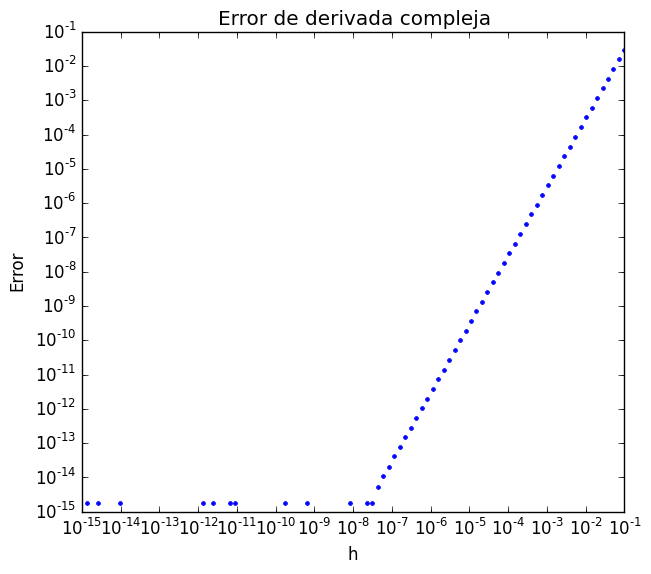

PyObject <matplotlib.text.Text object at 0x7fe68bea1240>

In [39]:
#Graficación del error absoluto usando derivadas complejas, se hace uso de escala loglog
figure(figsize = (7,6))
loglog(intervalo_h, err_deriv3, marker = ".", linestyle ="")
xlabel("h")
ylabel("Error")
title("Error de derivada compleja")

*** Observaciones *** A diferencia de los otros dos métodos, se observa que el comportamiento es realmente estable, a partir de valores cercanos a $h \approx 10^{-8}$ el error se comporta de manera constante.

In [40]:
#Calculando parámetros para la derivada compleja
x_3 = logspace(-7.6,-1,1000)
y_3 = Float64[abs(derivada_compleja(f,x,1)-9) for x in x_3]
y = log(y_3)
x = log(x_3)
linreg(x, y)

2-element Array{Float64,1}:
 1.09867
 2.00001

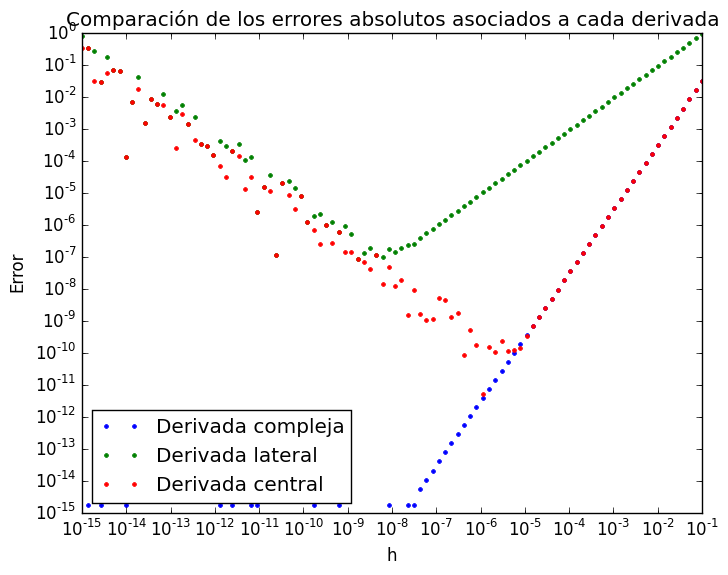

PyObject <matplotlib.text.Text object at 0x7fe68c04f5c0>

In [41]:
loglog(intervalo_h, err_deriv3, label ="Derivada compleja", marker = ".", linestyle ="")
loglog(intervalo_h, err_deriv, label ="Derivada lateral", marker = ".", linestyle ="")
loglog(intervalo_h, err_deriv2, label = "Derivada central", marker = ".", linestyle ="")
legend(loc="auto")
xlabel("h")
ylabel("Error")
title("Comparación de los errores absolutos asociados a cada derivada")

## Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

**Respuesta: ** Basándonos en la gráfica podemos concluir que el método más efectivo es emplear derivadas complejas, pues el error deja de tener un comportamiento decreciente para un valor de h muy pequeño ¡$\approx10^{-8}$!, además, a partir de éste valor el error no crece, se mantiene constante, en contraste con las otras derivadas, cuyo error comienza a crecer.

- ¿Qué comportamiento de las derivadas en términos de $h$ nos incomoda (en lo más profundo de las entrañas)? ¿A qué se debe esto?

1. Para el caso de las derivadas laterales y simétricas: si $h\to0$ el error comienza a crecer (esto a partir de un $h_0$).
2. Para el caso de la derivada compleja: si $h\to0$ el error ya no decrece, permanece constante.

Dado a que la aproximación $h\to0$ la realizamos en una computadora (y que ésta tiene cierta precisión para tomar valores "reales"), tendremos un error numérico, dicho error numérico hace que nuestro cálculo falle a partir de cierto punto.